# PREDICTING 10 YEAR RISK OF CORONARY HEART DISEASE

From the dataset, we try to analyze various **factors that may be related to a person having a risk of heart problems** in the future. 

 Our motive is to train a **logistic regression model** using this data to help predict who have more risk of getting heart disease 

## Importing necessary libraries to work with

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

## Loading the dataset

In [2]:
data = pd.read_csv('framingham.csv')

## Viewing data structure and Identifying the Target variable (dependent variable)

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### `'TenYearCHD'` is the **Target Variable** 

## Removing `null` entries

In [4]:
df = data.dropna()

## Identifying higly correlated variables

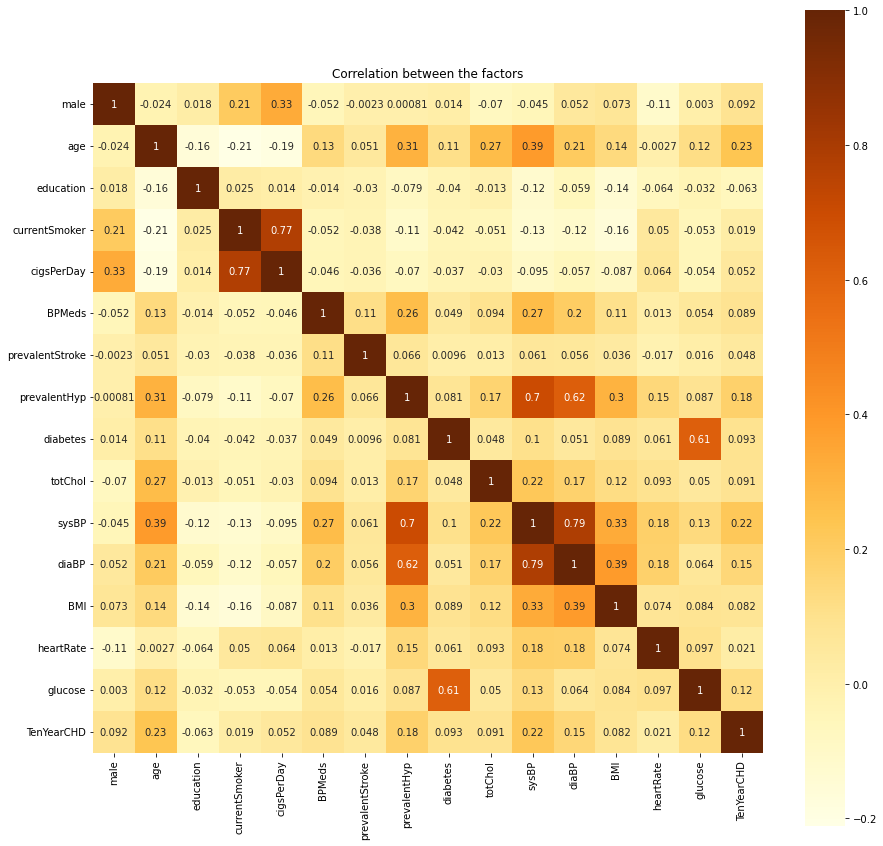

In [5]:
corr = df.corr()
plt.figure(figsize = (15,15))
sb.heatmap(corr, square=True, annot=True, cmap="YlOrBr").set_title('Correlation between the factors')
plt.show()

### The following pairs of variables are highly correlated (r > 0.6):
* **sysBP & prevalentHyp**
* **cigsPerDay & currentSmoker**
* **sysBP & diaBP**
* **glucose & diabetes**
* **diaBP & prevalentHyp**

### **choose** `sysBP`, `cigsPerDay` and `glucose`

### **drop** `prevalentHyp`, `currentSmoker`, `diaBP` and `diabetes`

## Eliminating highly correlated variable pairs

In [6]:
new_data = df.drop(['prevalentHyp', 'currentSmoker', 'diaBP', 'diabetes'], axis='columns')
new_data.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,225.0,150.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,285.0,130.0,23.10,85.0,85.0,0


The above dataset is finally the one that we can work with and train our model

## One Hot Encoding the categorical variables

In [7]:
categorical_variables = ['male', 'education', 'BPMeds', 'prevalentStroke']

In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
catvar = ohe.fit_transform(new_data[categorical_variables]).toarray()

## Normalizing the continuous variables

In [9]:
continuous_variables = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(new_data[continuous_variables])
scaled_data=scaler.transform(new_data[continuous_variables])

## Forming a matrix array of feature variables (continuous and categorical)

In [11]:
matrix = np.concatenate((scaled_data, catvar), axis=1)

## Splitting the dataset into train and test datasets (80-20)

In [12]:
x = matrix
y = new_data['TenYearCHD']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.20)

## Implementing Logistic regression 

In [14]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(max_iter=10000)
model.fit(x_train,y_train)
predictions=model.predict(x_test)

## Results 

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print("classification report :")
print(classification_report(y_test,predictions))
print("confusion matrix :")
print(confusion_matrix(y_test,predictions))
from sklearn.metrics import accuracy_score
print("accuracy score is :", accuracy_score(y_test, predictions))
print("error :", 1-accuracy_score(y_test, predictions))

classification report :
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       627
           1       0.50      0.07      0.12       105

    accuracy                           0.86       732
   macro avg       0.68      0.53      0.52       732
weighted avg       0.81      0.86      0.81       732

confusion matrix :
[[620   7]
 [ 98   7]]
accuracy score is : 0.8565573770491803
error : 0.14344262295081966


# END